In [1]:
import pandas as pd
import numpy as np

In [2]:
title=["Martion", "Kingsman", "Captin America", "Interstella"]
num_heart=[8759, 10132, 12078, 16430]
actual=[4870000, 6120000, 8660000, 10300000]
data=pd.DataFrame({'title':title, 'num_heart':num_heart, 'actual':actual})
data

,title,num_heart,actual
0,Martion,8759,4870000
1,Kingsman,10132,6120000
2,Captin America,12078,8660000
3,Interstella,16430,10300000


In [3]:
X=data['num_heart'].values.reshape(-1, 1)
y=data['actual'].values

In [4]:
from sklearn import linear_model
sk_lr=linear_model.LinearRegression()
sk_lr.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
sk_lr.intercept_

-847857.6643664883

In [6]:
sk_lr.coef_

array([703.42055017])

In [8]:
Ok=np.array([12008])
Ok_data=Ok.reshape(-1, 1)
Ok_data

array([[12008]])

In [9]:
predict_result=sk_lr.predict(Ok_data)
data['predict_actual']=sk_lr.predict(X)

In [10]:
new_data=pd.DataFrame({'title':'Okza', 'num_heart':Ok, 'predict_actual':predict_result})
data=data.append(new_data, ignore_index=True, sort=True)
data

,actual,num_heart,predict_actual,title
0,4870000.0,8759,5.313403e+06,Martion
1,6120000.0,10132,6.279199e+06,Kingsman
2,8660000.0,12078,7.648056e+06,Captin America
3,10300000.0,16430,1.070934e+07,Interstella
4,NaN,12008,7.598816e+06,Okza


In [11]:
data=data.sort_values(by=['predict_actual'])
type(data['num_heart'])

pandas.core.series.Series

Text(0.5, 1.0, 'The Actul number of Audiences \npredicted by the number of hearts in Watcha')

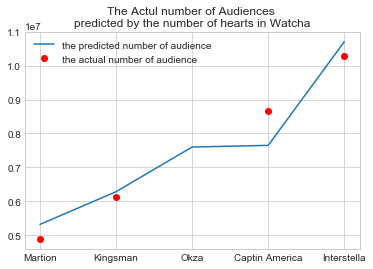

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig=plt.figure()
ax=plt.axes()
ax.plot(data['title'],data['predict_actual'] ,label='the predicted number of audience')
ax.plot(data['title'], data['actual'], 'o', color='red', label='the actual number of audience')
ax.legend()
plt.title("The Actul number of Audiences \npredicted by the number of hearts in Watcha")

